In [ ]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

def classify_decade(year_str):
    year = int(year_str)
    val = -1
    if year < 1900:
        val = 0
    elif 1900 <= year <= 1910:
        val = 1
    elif year > 1910:
        val = 2
    return val

with open("Poems_Unparsed.JSON", "r") as file:
    data = json.load(file)
poems_X = [poem["content"] for poem in data if poem["year"] != ""]
poems_Y = [classify_decade(poem["year"]) for poem in data if poem["year"] != ""]

X_train, X_test, y_train, y_test = train_test_split(poems_X, poems_Y, test_size=0.2, random_state=42)
#train a model to predict the year of a poem based on its content:
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Print the accuracy score:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")



In [15]:
import json
with open("Poems_Unparsed.JSON", "r", encoding='utf-8') as file:
    data = json.load(file)
poems = [poem["content"] for poem in data]
names = [poem["poem"] for poem in data]

In [ ]:
#the following script shows how to use the model to predict the topics of a poem:

from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('onlplab/alephbert-base')
model = AutoModelForSequenceClassification.from_pretrained('onlplab/alephbert-base')
topics = ['מוות', 'צער', 'יהדות', 'ציונות', 'פטריוטיזם', 'בכי', 'אהבה','מלחמה', 'פוליטיקה', 'תקווה', 'נעורים']

def extract_topics(poem):
    # Tokenize the poem
    inputs = tokenizer(poem, truncation=True, padding=True, return_tensors='pt')

    # Forward pass through the model
    outputs = model(**inputs)

    # Get the predicted labels
    predicted_labels = outputs.logits.argmax(dim=1)

    # Return the topics related to the poem
    return [topics[label] for label in predicted_labels]



In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('onlplab/alephbert-base')
model = AutoModelForSequenceClassification.from_pretrained('onlplab/alephbert-base')

def extract_topics(poem):
    # Tokenize the poem
    inputs = tokenizer(poem, truncation=True, padding=True, return_tensors='pt')

    # Forward pass through the model
    outputs = model(**inputs)

    # Get the predicted labels
    predicted_labels = outputs.logits.argmax(dim=1)

    # Return the topics related to the poem
    return predicted_labels[0]

In [ ]:
for poem,name in zip(poems,names):
    print(f"poem: {name}, topics: {extract_topics(poem)}")

In [19]:
from trankit import Pipeline
p = Pipeline('hebrew')

Loading pretrained XLM-Roberta, this may take a while...
Loading tokenizer for hebrew
Loading tagger for hebrew
Loading multi-word expander for hebrew
Loading lemmatizer for hebrew
Active language: hebrew


In [20]:
poems_tokenized = []
for i,poem in enumerate(poems):
    poems_tokenized.append(p.tokenize(poem))
    if i==0:
        print(poems_tokenized[0])

{'text': 'שלום רב שובך, צפרה נחמדת,\n\nמארצות החם אל־חלוני -\n\nאל קולך כי ערב מה־נפשי כלתה\n\nבחרף בעזבך מעוני.\n\n\nזמרי, ספרי, צפורי היקרה,\n\nמארץ מרחקים נפלאות,\n\nהגם שם בארץ החמה, היפה,\n\nתרבינה הרעות, התלאות?\n\n\nהתשאי לי שלום מאחי בציון,\n\nמאחי הרחוקים הקרובים?\n\nהוי מאשרים! הידעו ידע\n\nכי אסבל, הוי אסבל מכאובים?\n\n\nהידעו ידע מה רבו פה שטני,\n\nמה רבים, הוי רבים לי קמים?\n\nזמרי, צפורי, נפלאות מארץ,\n\nהאביב בה ינוה עולמים.\n\n\nהתשאי לי שלום מזמרת הארץ,\n\nמעמק, מגיא, מראש הרים?\n\nהרחם, הנחם אלוה את־ציון,\n\nאם עודה עזובה לקברים?\n\n\nועמק השרון וגבעת הלבונה -\n\nהיתנו את־מרם, את־נרדם?\n\nההקיץ משנתו השב ביערים,\n\nהלבנון הישן, הנרדם?\n\n\nהירד כפנינים הטל על הר חרמון,\n\nאם ירד ויפל כדמעות?\n\nומה־שלום הירדן ומימיו הבהירים?\n\nושלום כל־ההרים, הגבעות?\n\n\nהסר מעליהם הענן הכבד,\n\nהפרש עלטה, צלמות? -\n\nזמרי, צפורי, על־ארץ בה מצאו\n\nאבותי החיים, המות!\n\n\nהאם־עוד לא־נבלו הפרחים שתלתי\n\nכאשר נבלתי אנכי?\n\nאזכרה ימים כמוהם פרחתי,\n\nאך עתה זקנתי, סר כחי.\n\n\nספרי, 

Downloading:  19%|███████████████████▊                                                                                    | 213M/1.12G [16:46<1:11:13, 211kB/s]


In [45]:
filtered_tokens = [token for token in poems_tokenized[0] if not token.is_stop]

AttributeError: 'str' object has no attribute 'is_stop'

In [38]:
with open("all_songs_parsed.JSON", 'w') as f:
    json.dump(poems_tokenized, f, indent=4, ensure_ascii=False)

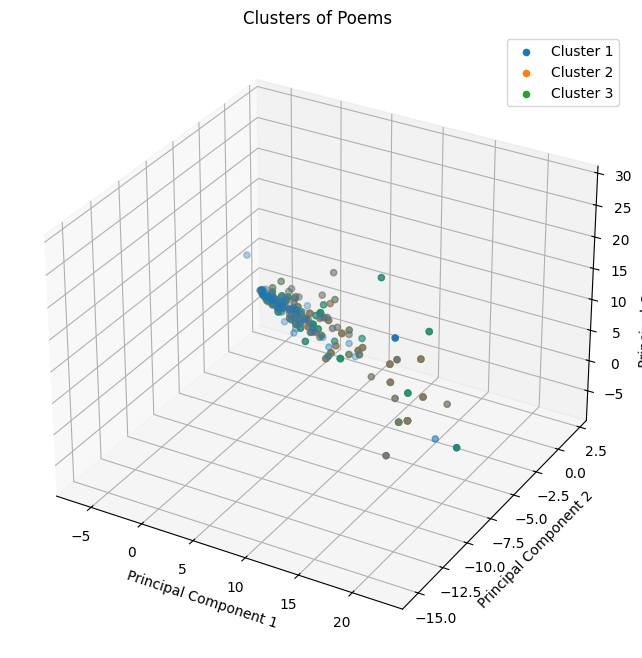

In [34]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

proccesed_poems = [poems_tokenized[i]["text"] for i in range(len(poems_tokenized))]
# Convert text data to feature vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(proccesed_poems)

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X.toarray())
X_reduced = X_reduced[np.logical_and(X_reduced[:, 0] < 25, X_reduced[:, 1] < 25)]
# Clustering
k = 3  # Number of clusters
knn = NearestNeighbors(n_neighbors=k)
knn.fit(X_reduced)
distances, indices = knn.kneighbors(X_reduced)

# Visualize clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(k):
    cluster_points = X_reduced[indices[:, i]]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i+1}')
ax.set_title("Clusters of Poems")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.show()